In [2]:
import pandas as pd
import numpy as np

# Importing the dataset
df = pd.read_csv("updated_synthetic_customer_data.csv")
df

,Age,Gender,Location,Purchase_Category,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Customer_Satisfaction,Engagement_with_Ads,Time_of_Purchase,Purchase_Intent,Time_to_Decision
0,39,Male,Indonesia,Beauty,2,In-Store,4,5,3,Low,5,Low,2024-05-31,Wants-based,8
1,21,Other,Philippines,Beauty,5,Mixed,5,3,7,High,8,Medium,2025-03-15,Impulsive,2
2,53,Male,Tajikistan,Electronics,7,Mixed,1,1,1,Medium,4,Low,2021-07-08,Need-based,7
3,49,Female,United States of America,Books,13,Online,3,1,2,High,4,High,2022-03-15,Need-based,6
4,27,Other,Hungary,Home & Kitchen,11,Mixed,4,4,6,High,7,High,2020-12-10,Planned,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,54,Female,Costa Rica,Home & Kitchen,15,In-Store,4,4,6,Medium,7,Medium,2023-04-10,Need-based,11
2996,24,Male,Djibouti,Books,1,In-Store,2,5,3,Medium,6,Low,2022-09-23,Impulsive,2
2997,33,Female,Samoa,Toys,10,Online,3,2,1,Medium,3,High,2021-11-28,Impulsive,0
2998,52,Other,Palestinian Territory,Home & Kitchen,15,Mixed,5,5,9,Low,6,Low,2020-09-27,Impulsive,1


In [3]:
#check missing values
print("\nMising Value:\n",df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",df.dtypes)


Mising Value:
 Age                                        0
Gender                                     0
Location                                   0
Purchase_Category                          0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   737
Customer_Satisfaction                      0
Engagement_with_Ads                      690
Time_of_Purchase                           0
Purchase_Intent                            0
Time_to_Decision                           0
dtype: int64

Datatype for each column
 Age                                       int64
Gender                                   object
Location                                 object
Purchase_Category                        object
Frequency_of_Purchase                     int64
Purchase_Channel             

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

cleaned_df = df.copy()

# Handle missing values
cleaned_df['Social_Media_Influence'] = cleaned_df['Social_Media_Influence'].fillna(cleaned_df['Social_Media_Influence'].mode()[0])
cleaned_df['Engagement_with_Ads'] = cleaned_df['Engagement_with_Ads'].fillna(cleaned_df['Engagement_with_Ads'].mode()[0])

# Categorical colums label for 'Gender'
def encode_gender(gender):
    if gender == 'Male':
        return 0
    elif gender == 'Female':
        return 1
    else:
        return 2

cleaned_df['Gender'] = cleaned_df['Gender'].apply(encode_gender)

# Convert categorical variables to numerical format using label encoding
categorical_cols = ['Gender', 'Location', 'Purchase_Category', 'Purchase_Channel', 'Social_Media_Influence', 
                    'Engagement_with_Ads', 'Purchase_Intent']
le_dict = {}  # Store label encoders

for column in categorical_cols:
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    le_dict[column] = le

cleaned_df.head()

#check missing values
print("\nMising Value:\n",cleaned_df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",cleaned_df.dtypes)


Mising Value:
 Age                                      0
Gender                                   0
Location                                 0
Purchase_Category                        0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Time_of_Purchase                         0
Purchase_Intent                          0
Time_to_Decision                         0
dtype: int64

Datatype for each column
 Age                                       int64
Gender                                    int64
Location                                  int64
Purchase_Category                         int64
Frequency_of_Purchase                     int64
Purchase_Channel                          int64
Brand_Loyal

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define features and target variable
# Define features and target variable
feature_df = cleaned_df[['Age', 'Gender', 'Purchase_Category', 'Frequency_of_Purchase', 'Purchase_Channel', 'Brand_Loyalty', 
                         'Product_Rating', 'Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence', 'Customer_Satisfaction', 
                         'Engagement_with_Ads', 'Time_to_Decision']]

x = np.asarray(feature_df)
y = np.asarray(cleaned_df['Purchase_Intent'])  # Target

# Split dataset into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)  # Stratify to balance classes

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear SVM

In [6]:
# Create an SVM model with
clf = SVC(kernel='linear', C=1)

# Train the model
SvmModel = clf.fit(x_train_scaled, y_train)

# Test the model
y_pred = clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("SVM Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

SVM Model Performance:
Accuracy: 0.46
Precision: 0.41774414781442515
Recall: 0.46
F1-score: 0.420116427490401


### XGBoost

In [7]:
# Train XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(x_train_scaled, y_train)

# Predict on test data
y_pred = xgb_clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("XGBoost Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

XGBoost Model Performance:
Accuracy: 0.445
Precision: 0.41654718991935125
Recall: 0.445
F1-score: 0.42636100700967094


### Decision Tree

In [8]:
# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, class_weight="balanced", random_state=42)
DecisionTreeModel = clf.fit(x_train_scaled, y_train)

# Test the model
y_pred = clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Decision Tree Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Decision Tree Model Performance:
Accuracy: 0.4533333333333333
Precision: 0.41776692990848024
Recall: 0.4533333333333333
F1-score: 0.4155944772650371


### Logistic Regression

In [9]:
from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(x_train_scaled, y_train)

# Test
y_pred = logreg.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression Model Performance:
Accuracy: 0.46166666666666667
Precision: 0.4225359373345533
Recall: 0.46166666666666667
F1-score: 0.4294082679214723


### Random Forest

In [10]:
# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced', random_state=42)
rf_clf.fit(x_train_scaled, y_train)

# Predict on test data
y_pred = rf_clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Random Forest Model Performance:
Accuracy: 0.45666666666666667
Precision: 0.41478322176471055
Recall: 0.45666666666666667
F1-score: 0.42663825461370036


In [ ]:
import pandas as pd

# Collect model performance metrics from previous cells
model_names = ["Linear SVM", "XGBoost", "Decision Tree", "Logistic Regression", "Random Forest"]
accuracies = []
precisions = []
recalls = []
f1_scores = []

# SVM metrics
accuracies.append(0.46)
precisions.append(0.41774414781442515)
recalls.append(0.46)
f1_scores.append(0.420116427490401)

# XGBoost metrics
accuracies.append(0.445)
precisions.append(0.41654718991935125)
recalls.append(0.445)
f1_scores.append(0.42636100700967094)

# Decision Tree metrics
accuracies.append(0.4533333333333333)
precisions.append(0.41776692990848024)
recalls.append(0.4533333333333333)
f1_scores.append(0.4155944772650371)

# Logistic Regression metrics
accuracies.append(0.46166666666666667)
precisions.append(0.4225359373345533)
recalls.append(0.46166666666666667)
f1_scores.append(0.4294082679214723)

# Random Forest metrics
accuracies.append(0.45666666666666667)
precisions.append(0.41478322176471055)
recalls.append(0.45666666666666667)
f1_scores.append(0.42663825461370036)

# 



# Create DataFrame
performance_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-score": f1_scores
})

performance_df

,Model,Accuracy,Precision,Recall,F1-score
0,Linear SVM,0.460000,0.417744,0.460000,0.420116
1,XGBoost,0.445000,0.416547,0.445000,0.426361
2,Decision Tree,0.453333,0.417767,0.453333,0.415594
3,Logistic Regression,0.461667,0.422536,0.461667,0.429408
4,Random Forest,0.456667,0.414783,0.456667,0.426638


In [12]:
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {
    'C': [0.1, 1, 10],  # Example: regularization parameter
    'kernel': ['linear', 'rbf'],  # Example: kernel type
    'gamma': ['scale', 'auto'] # Example: kernel coefficient for 'rbf'
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')  # cv=3 for 3-fold cross-validation
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. Evaluate the best model on the test set
best_model = grid_search.best_estimator_  # Get the model with best hyperparameters
accuracy = best_model.score(x_test, y_test)  # Evaluate on the test set
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.45166666666666666
Precision: 0.41478322176471055
Recall: 0.45666666666666667
F1-score: 0.42663825461370036


In [14]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression with higher max_iter
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 2000, 3000]  # Increased max_iter values
}

lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(x_train_scaled, y_train)  # Use scaled data

# Best hyperparameters
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

# Evaluate on test set
best_lr = grid_search_lr.best_estimator_
accuracy = best_lr.score(x_test_scaled, y_test)  # Use scaled data
y_pred_lr = best_lr.predict(x_test_scaled)
precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=1)

print("Logistic Regression Model Performance (with tuning):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Hyperparameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}
Logistic Regression Model Performance (with tuning):
Accuracy: 0.46166666666666667
Precision: 0.4227719800637742
Recall: 0.46166666666666667
F1-score: 0.427552551564614


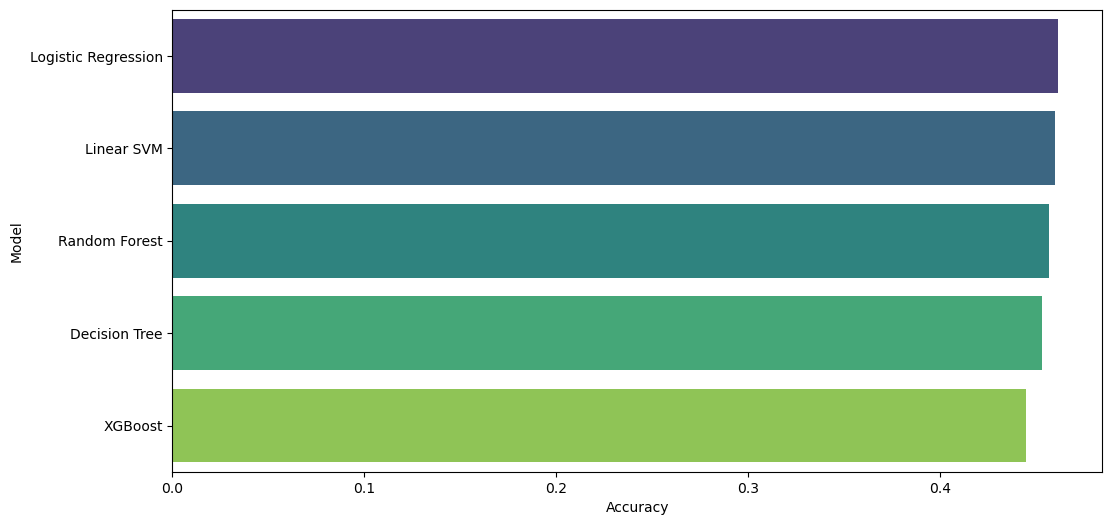

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by Accuracy in ascending order
sorted_df = performance_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=sorted_df, hue="Model", palette="viridis", legend=False)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

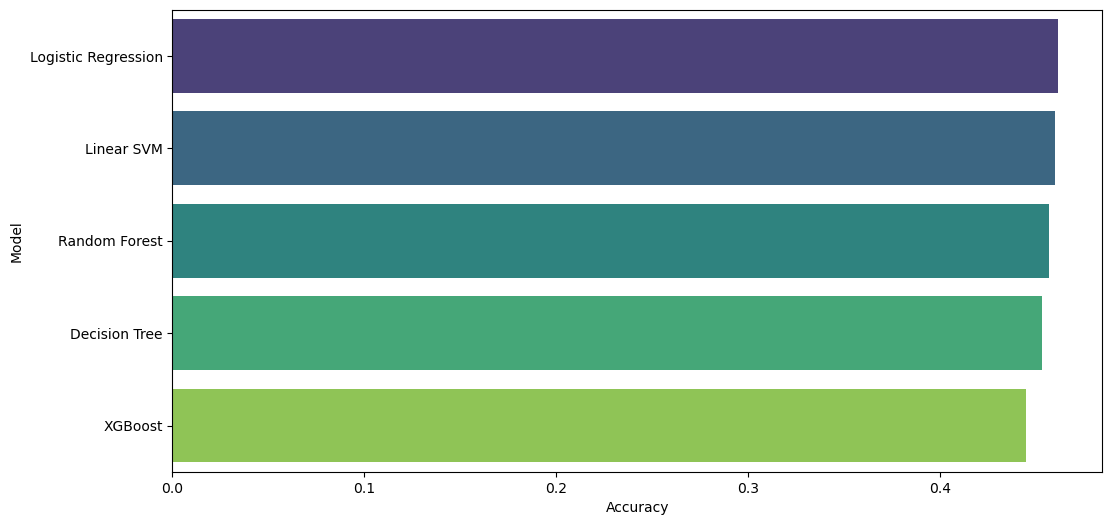

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by Accuracy in ascending order
sorted_df = performance_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=sorted_df, hue="Model", palette="viridis", legend=False)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()